# Notebook E-tivity 3 CE4021 Task 1

Student name: Pierce Currid

Student ID: 23260092

<hr style=\"border:2px solid gray\"> </hr>

## Imports

In [31]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt

 If you believe required imports are missing, please contact your moderator.

<hr style=\"border:2px solid gray\"> </hr>

## Task 1

### Option Height:
#### <i>Observing the average height of customers of a theme park to establish the mean and standard deviation.</i>

Numerous natural phenomena are normally distributed, including height within a population. Normal distribution is usually associated with the prototypical bell curve. It is continuous probability distribution.
Heights aren't normally distributed, but the central limit theorem sheds some light here, and explains why.
The example of coin flipping helps - if you flip a coin once, the distribution of the probable number of heads would not be a normal distribution (you'd have .5 probability of getting head/tail ). If you scale up to 50,100,1000,..n tosses of the coin, the probability starts to look normally distributed. So as we start to scale out, the bell curve attributes start to show themselves.

The <b>central limit theorem (CLT)</b> explains this by stating:<br> 
<i>as n increases, the distribution of the sample mean or sum approaches a normal distribution.</i>


#### Standard Deviation $\sigma$:  
is the spread of a group of numbers/datapoints from the mean. In other words, how far apart number/data are within a dataset. This value is calculated as the square root of the variance (which is the average of the squared differences from the mean).

#### Mean $\mu$: 
is a central value of a set of numbers/datapoints. In other words, the average.  In normal distribution terms it's the peak in the bell curve. 

### Experiments

For this experiment, I'm going to try and keep it local and use the example of Funderland, which is an amusement park event that takes place in Dublin from Stephens Day (the day after Christmas) up until early/mid January. Now, there will of course be some inherent bias in the dataset as I'm using what I think make up the population of the event each day - mainly families and younger teenagers. These 2 cohorts will inform the heights that will build the mean and standard deviation values, that will in turn build the sample populations using the random module. 

The data source I'll use for mean heights for children, and standard deviations, is https://ncdrisc.org/index.html which comprises of 800 health scientists worldwide, and regularly publish work to eLife. This page shows the mean and deviation of children aged 5yrs old across the world, including Ireland:
https://ncdrisc.org/height-mean-ranking.html

This is fascinating btw https://ncdrisc.org/height-mean-distribution.html the slider shows the increase in height over the years. As is this projection of school aged kids height in 2081 https://www.thelancet.com/journals/lancet/article/PIIS0140-6736(20)31859-6/fulltext#seccestitle130

female children (5yr olds) = 114cm (range 112 - 115)

male children (5yr olds) = 115cm (range 113 - 117)

female teenagers = //TODO 

male teenagers = //TODO

female adults = //TODO

male adults = //TODO

Mean calculation = //TODO

Dec 26th overall mean = //TODO

Dec 29th overall mean = //TODO

Dec 30th overall mean = //TODO

Dec 31st overall mean = //TODO


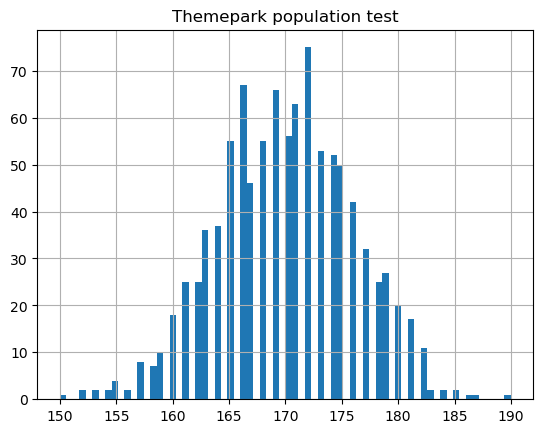

In [32]:
def sample_population(size: int, mean: int, standard_dev: int):
    """function to build a sample population to allow us to observe avg heights within a themepark"""
    
    sample_pop = []
    for i in range(size):
        sample_pop.append(round(np.random.normal(mean, standard_dev)))
    
    return sample_pop
    
def plot_graph(sample_population: list, bins_count:int, title: str):
    """builds a histogram to show the population data with inputs of sample population, bin count, and title"""
    
    plt.title(title)
    plt.hist(sample_population, bins_count)
    plt.grid()
    plt.show()

def population_mean(population: list):
    #TODO - use numpy .mean function
    pass
    
def population_standard_dev(population: list):
    #TODO  - use numpy .std function
    pass


def find_percent_below_height(height: int):
    #TODO - this might be a useful visualisation, to show the probability of all heights shorter than 'height' input
    pass
    

population = sample_population(1000,170,6)
plot_graph(population, 70,"Themepark population test")
    

<hr style=\"border:2px solid gray\"> </hr>

## Reflection

Write you reflection in below cell.